In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv("headbrain.csv")

In [55]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [56]:
df.shape

(237, 4)

In [57]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

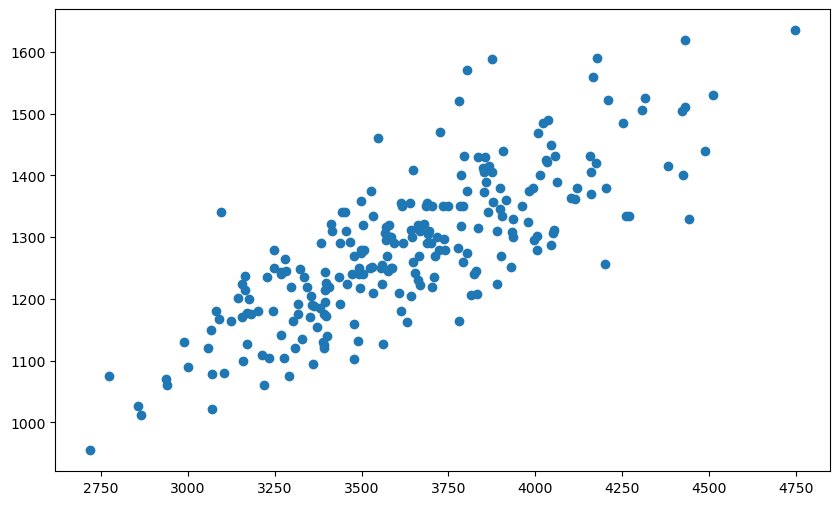

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

In [59]:
mean_x=np.mean(X)
mean_y=np.mean(y)

In [60]:
# slope nikaal rhe hai y2-y1/x2-x1 uper niche denominator se multiply bhi kar diya hai
numer = 0
denom = 0
n = len(X)
for i in range(n):
    numer+=(y[i] - mean_y) * (X[i]- mean_x)
    denom+= (X[i]-mean_x) ** 2

slope = numer/denom
intercept= mean_y -( slope * mean_x)

In [61]:
print("Slope: ",slope)
print("intercept: ",intercept)

Slope:  0.26342933948939945
intercept:  325.57342104944223


In [62]:
predictions = []
for i in range(n):
    y_pred = slope * X[i] + intercept
    predictions.append(int(y_pred))

In [63]:
#predicted values
print(predictions[:5])

[1514, 1310, 1448, 1320, 1425]


In [64]:
# Actual Values
print(y[:5])

[1530 1297 1335 1282 1590]


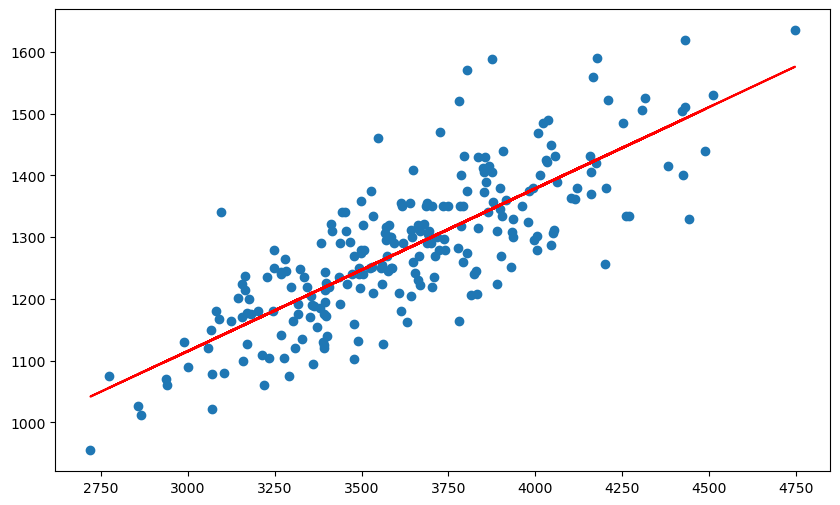

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions, 'r')
plt.show()

In [66]:
# MSE- mean square error
error=0
for i in range(n):
    error += (predictions[i]-y[i])**2
mse=error/n
print("MSE: ",mse)

MSE:  5202.9029535864975


In [67]:
#RMSE- Root mean square error
np.sqrt(mse)

np.float64(72.13115106239812)

## Gradient Descent Base Slope and intercept 

In [68]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler

In [69]:
X.shape

(237,)

In [70]:
# chnaging dimensions becoz we can pass 2D only to minmaxScaler
X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

In [71]:
X.shape

(237, 1)

In [72]:
minmax= MinMaxScaler()
scale_x = minmax.fit_transform(X)
scale_y = minmax.fit_transform(y)

In [73]:
print(scale_x[:5])

[[0.88406512]
 [0.50222003]
 [0.7602368 ]
 [0.52146029]
 [0.71879625]]


In [74]:
def gradientDescent(epochs,alpha):
    slope, inter =0,0
    for i in range(epochs):
        y_pred = scale_x * slope + inter # y = mx+c
        loss = y_pred - scale_y
        gradSlope = (2/n) * np.dot(loss.T, scale_x)
        gradInter = (2/n) * np.sum(loss)
        slope = slope - gradSlope * alpha
        inter = slope - gradInter * alpha
    return slope, inter

In [117]:
epochs = 7000
alpha = 0.01
slope, inter = gradientDescent(epochs, alpha)

In [118]:
print("New Slope:", slope)
print("New intercept:", inter)

New Slope: [[0.35405802]]
New intercept: [[0.35343961]]


In [123]:
predictions = []
for i in range(n):
    y_pred = slope[0][0] * X[i] + inter[0][0]
    predictions.append(y_pred)

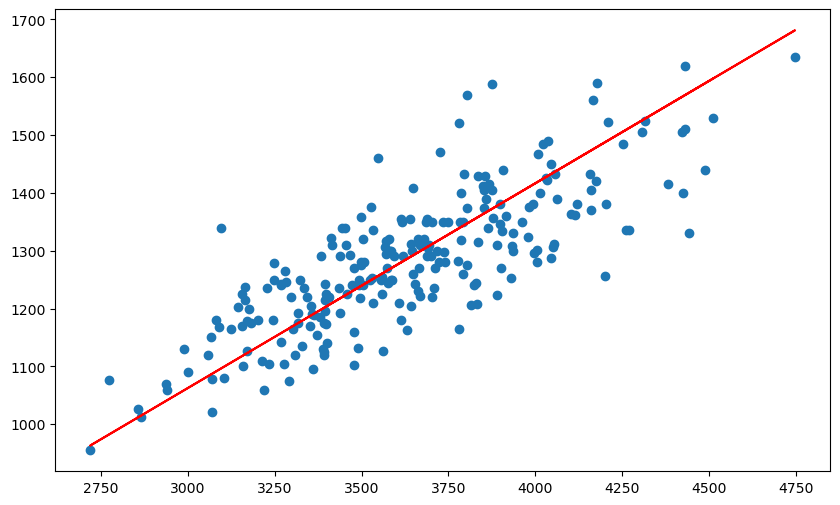

In [124]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions, 'r')
plt.show()